In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset/cleaned_dataset.csv", sep='\t', encoding='latin-1')

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248463 entries, 0 to 248462
Data columns (total 44 columns):
labels                                     248463 non-null int64
allergens                                  248463 non-null int64
traces                                     248463 non-null int64
additives_n                                221614 non-null float64
ingredients_from_palm_oil_n                221614 non-null float64
ingredients_that_may_be_from_palm_oil_n    221614 non-null float64
nutrition_grade_fr                         209549 non-null object
pnns_groups_1                              66816 non-null object
pnns_groups_2                              69223 non-null object
energy_100g                                244408 non-null float64
fat_100g                                   227896 non-null float64
saturated-fat_100g                         216297 non-null float64
monounsaturated-fat_100g                   18997 non-null float64
polyunsaturated-fat_100g      

# Analyse Univariée

In [4]:
selected_features = [col for col in dataset if col.endswith("_100g")]

fig = plt.figure(figsize=(12,120))
for i, col in enumerate(selected_features):
    ax1 = fig.add_subplot(len(selected_features), 1, i+1)
    sns.violinplot(x=dataset[col], ax=ax1)
plt.show()

In [5]:
dataset["manganese_100g"].describe()

count    1499.000000
mean        0.001455
std         0.005124
min         0.000000
25%         0.000000
50%         0.001000
75%         0.002000
max         0.130000
Name: manganese_100g, dtype: float64

In [6]:
selected_features = ["labels", "allergens", "traces", "additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]

fig = plt.figure(figsize=(12,120))
for i, col in enumerate(selected_features):
    ax1 = fig.add_subplot(len(selected_features), 1, i+1)
    sns.distplot(dataset[col].dropna(), kde=False, ax=ax1)  # kde=False, rug=True
plt.show()

# Analyse Multivariée

In [7]:
plt.figure(figsize=(12,12))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix)
plt.show()

In [8]:
sns.lmplot(x="additives_n", y="nutrition-score-uk_100g", data=dataset)
plt.show()

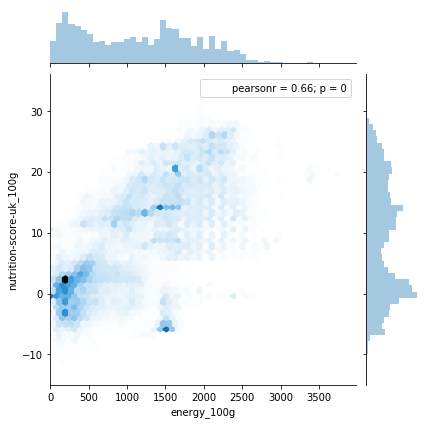

In [9]:
#sns.lmplot(x="energy_100g", y="nutrition-score-uk_100g", data=dataset)
sns.jointplot("energy_100g", "nutrition-score-uk_100g", data=dataset, kind="hex")
plt.show()

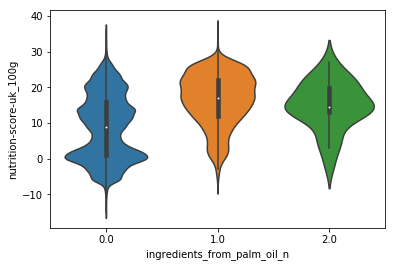

In [10]:
sns.violinplot(x="ingredients_from_palm_oil_n", y="nutrition-score-uk_100g", data=dataset)
plt.show()

In [11]:
sns.violinplot(x="ingredients_that_may_be_from_palm_oil_n", y="nutrition-score-uk_100g", data=dataset)
plt.show()

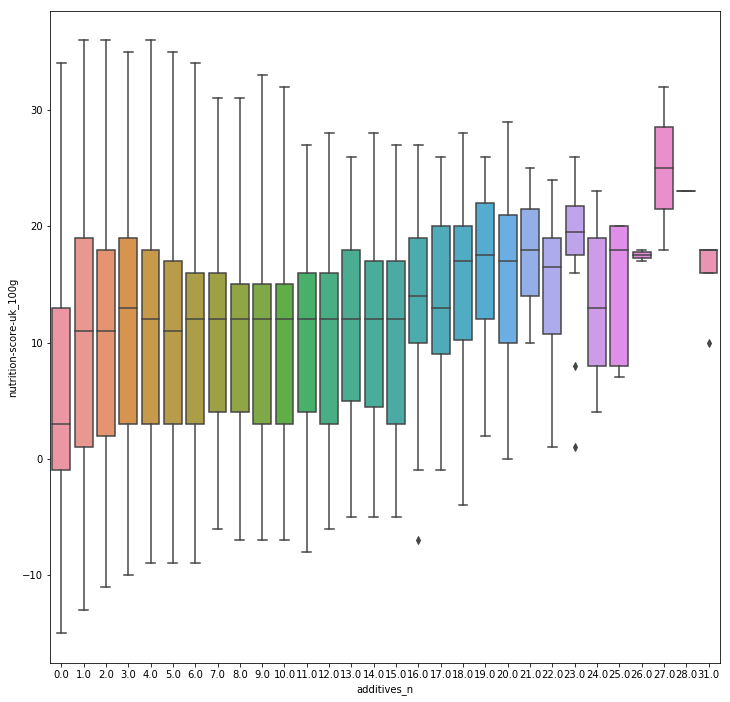

In [12]:
plt.figure(figsize=(12,12))
sns.boxplot(x="additives_n", y="nutrition-score-uk_100g", data=dataset) #violinplot
plt.show()

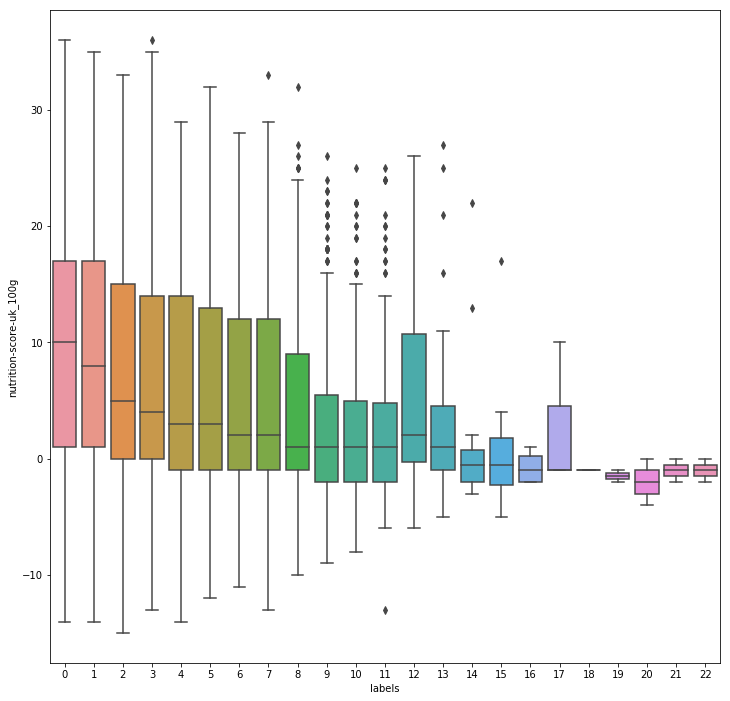

In [13]:
plt.figure(figsize=(12,12))
sns.boxplot(x="labels", y="nutrition-score-uk_100g", data=dataset)
plt.show()

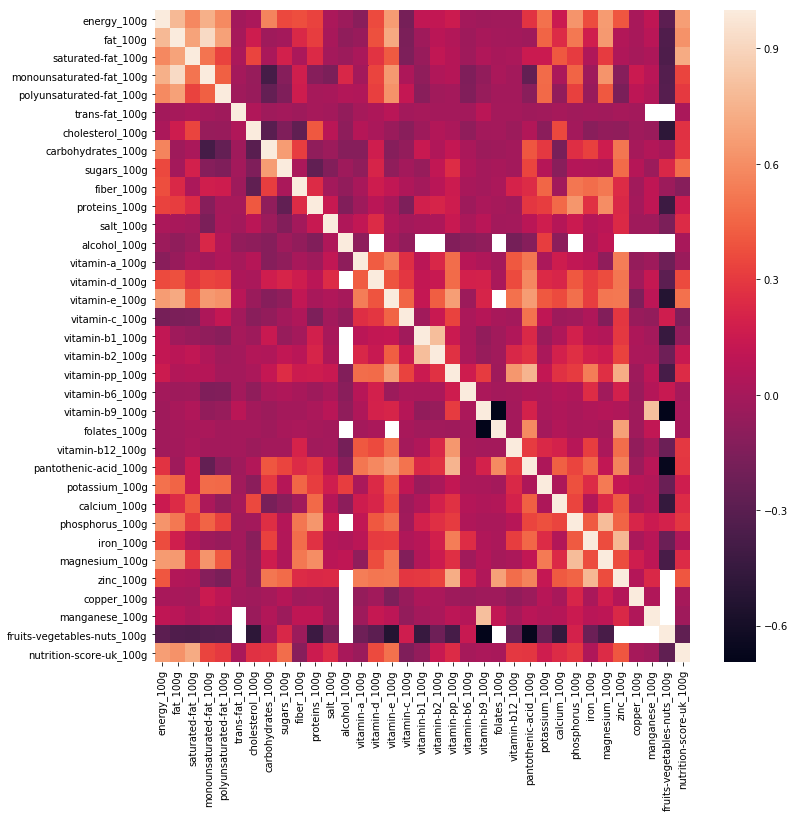

In [14]:
data = [x for x in dataset if x.endswith("_100g")]

plt.figure(figsize=(12,12))
correlation_matrix = dataset[data].corr()
# plt.imshow(correlation_matrix, cmap='hot',interpolation='nearest')
# plt.show()
sns.heatmap(correlation_matrix)
plt.savefig('cerrelation.png')
plt.show()

In [15]:
X, Y = "folates_100g", "vitamin-b9_100g"
print(len(dataset[dataset[X].notnull() & dataset[Y].notnull()]))

3


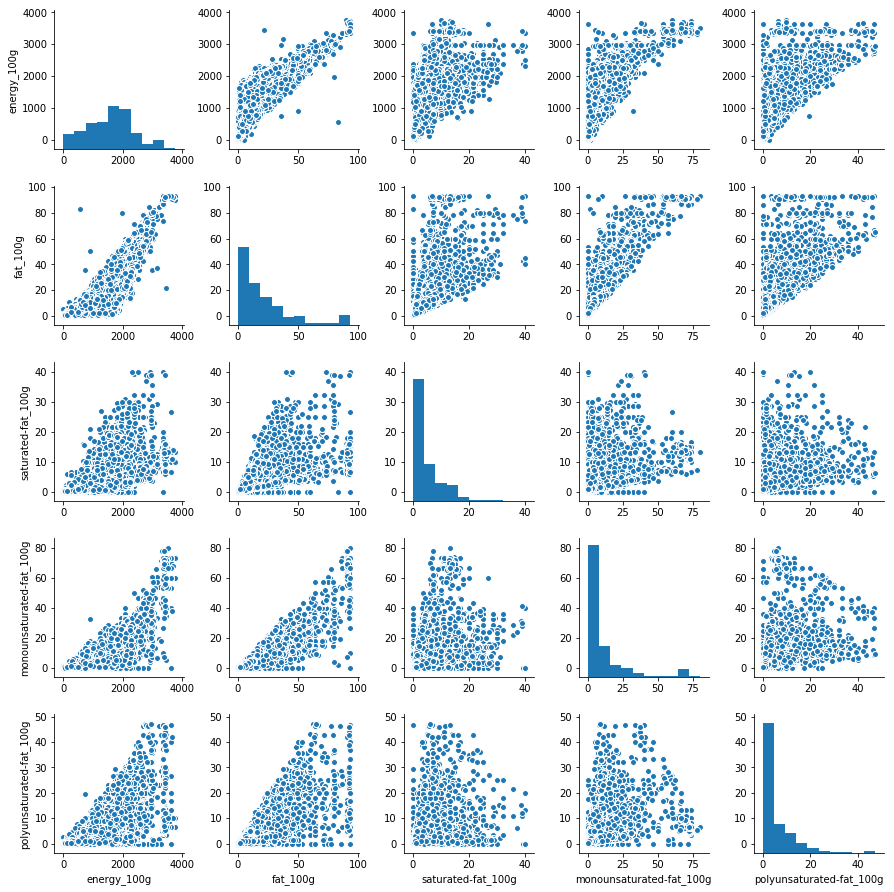

In [16]:
sns.pairplot(dataset[data[0:5]].dropna())
plt.savefig('fat-energy.png')
plt.show()

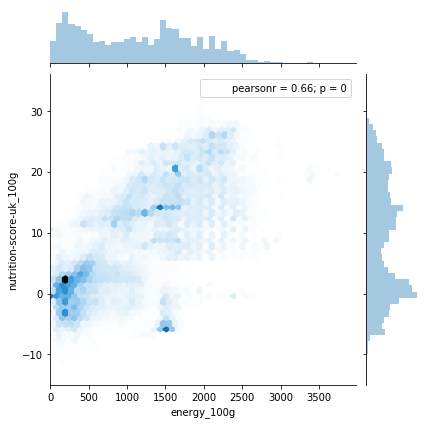

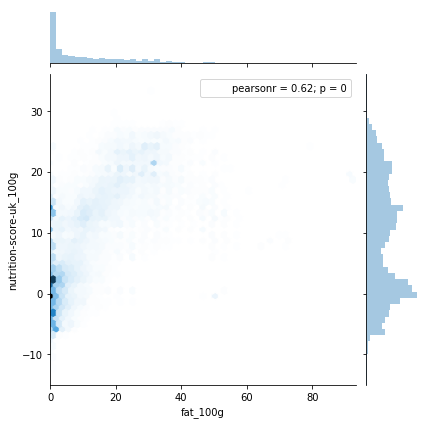

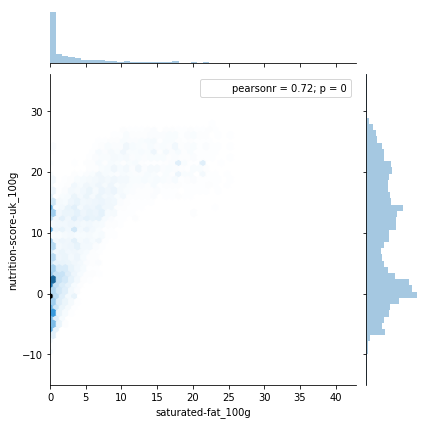

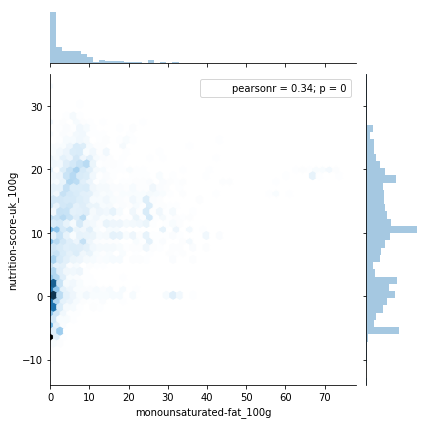

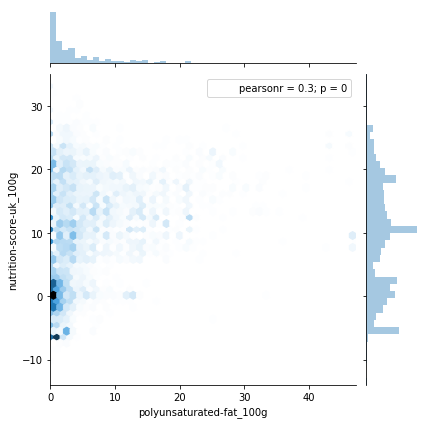

In [17]:
for i in range(5):
    plt.figure(figsize=(12,12))
#     plt.scatter(dataset[data[i]], dataset["nutrition-score-uk_100g"])
#     plt.title("{} vs {}".format(data[i], "nutrition-score-uk_100g"))
#     plt.xlabel(data[i])
#     plt.ylabel("nutrition-score-uk_100g")
    sns.jointplot(data[i], "nutrition-score-uk_100g", data=dataset, kind="hex")
    plt.savefig('{} vs {}.png'.format(data[i], "nutrition-score-uk_100g"))
    plt.show()

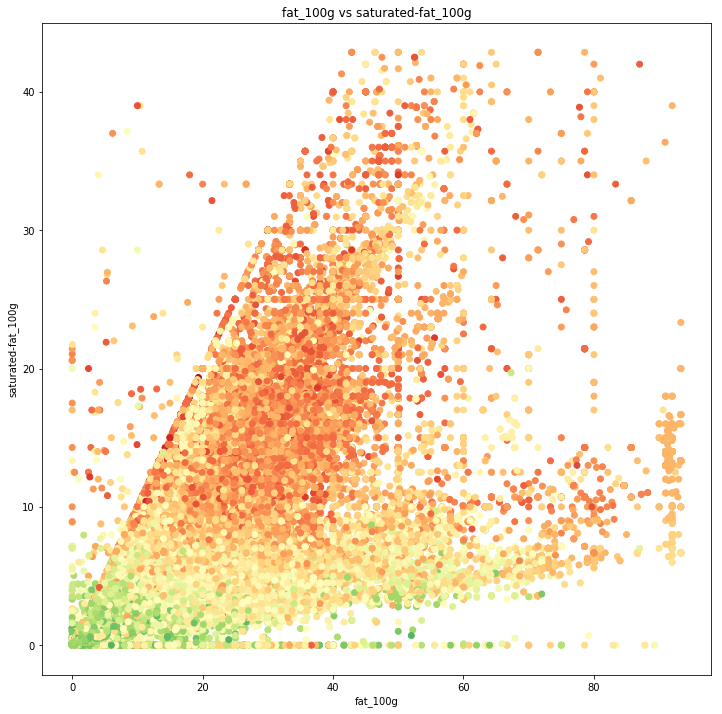

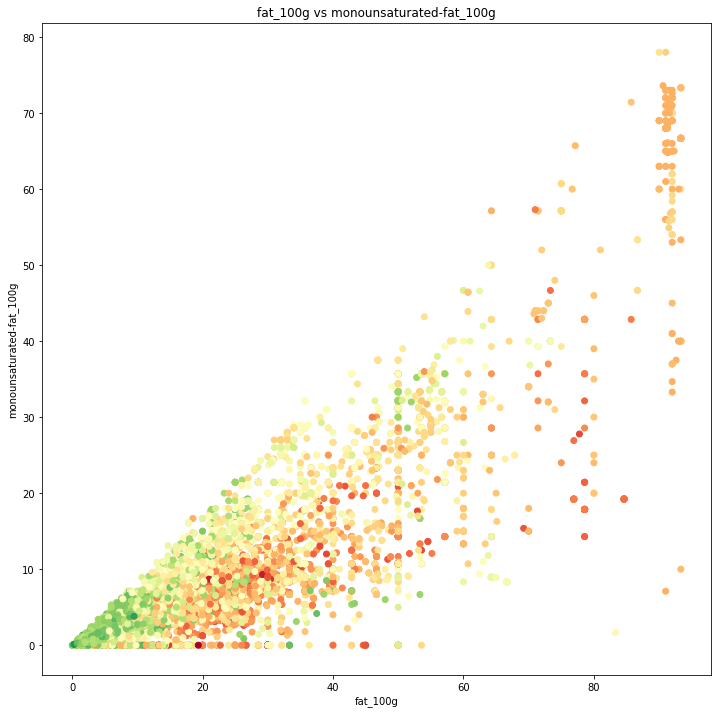

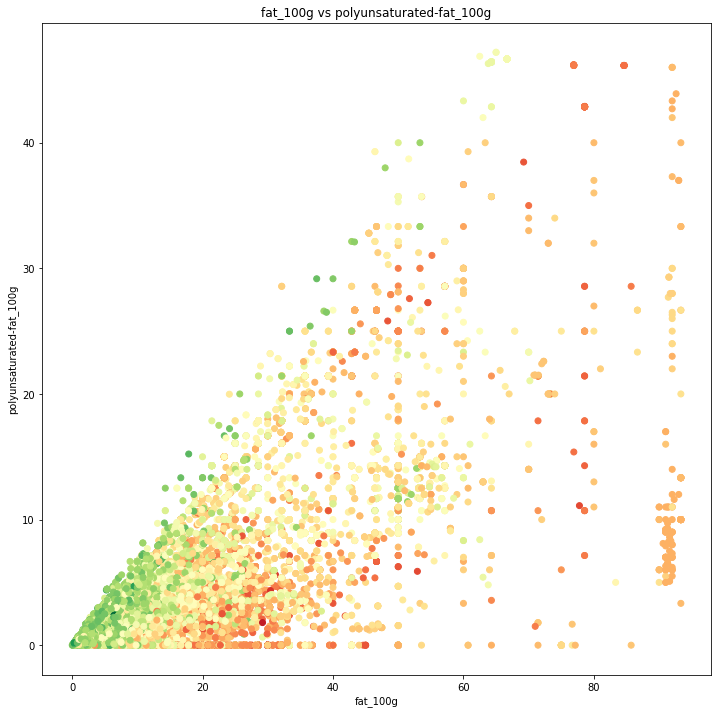

In [18]:
x = "fat_100g"
y_list = ["saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g"]

for y in y_list:
    fig = plt.figure(figsize=(12,12))
    plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

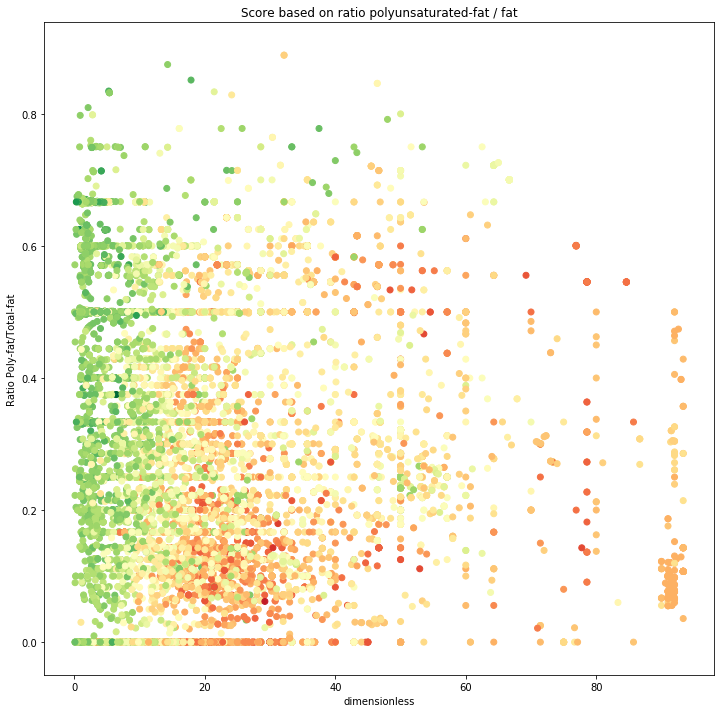

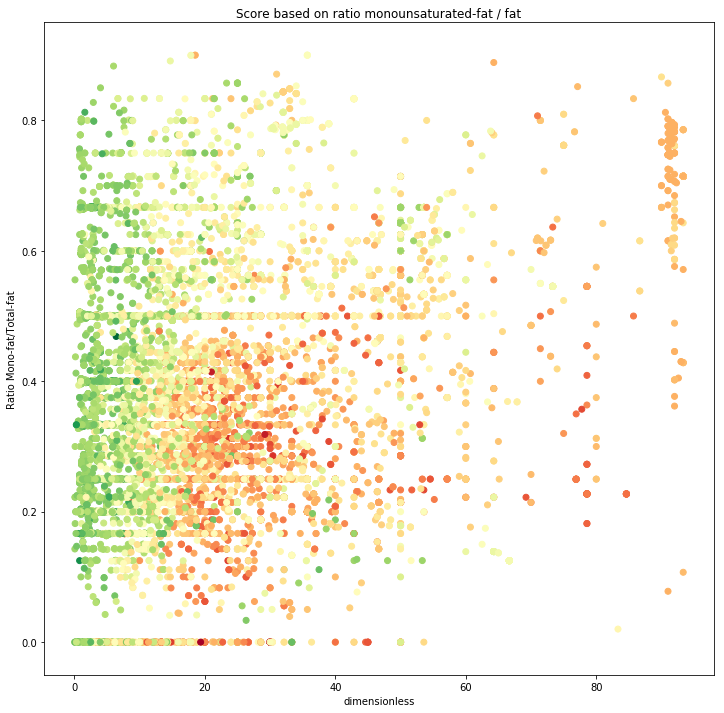

In [39]:
ratio_poly_fat = dataset["polyunsaturated-fat_100g"]/dataset["fat_100g"]
ratio_mono_fat = dataset["monounsaturated-fat_100g"]/dataset["fat_100g"]

fig = plt.figure(figsize=(12,12))
plt.scatter(dataset["fat_100g"], ratio_poly_fat, c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
plt.title("Score based on ratio {} / {}".format("polyunsaturated-fat", "fat"))
plt.xlabel("dimensionless")
plt.ylabel("Ratio Poly-fat/Total-fat")
plt.show()

fig = plt.figure(figsize=(12,12))
plt.scatter(dataset["fat_100g"], ratio_mono_fat, c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
plt.title("Score based on ratio {} / {}".format("monounsaturated-fat", "fat"))
plt.xlabel("dimensionless")
plt.ylabel("Ratio Mono-fat/Total-fat")
plt.show()

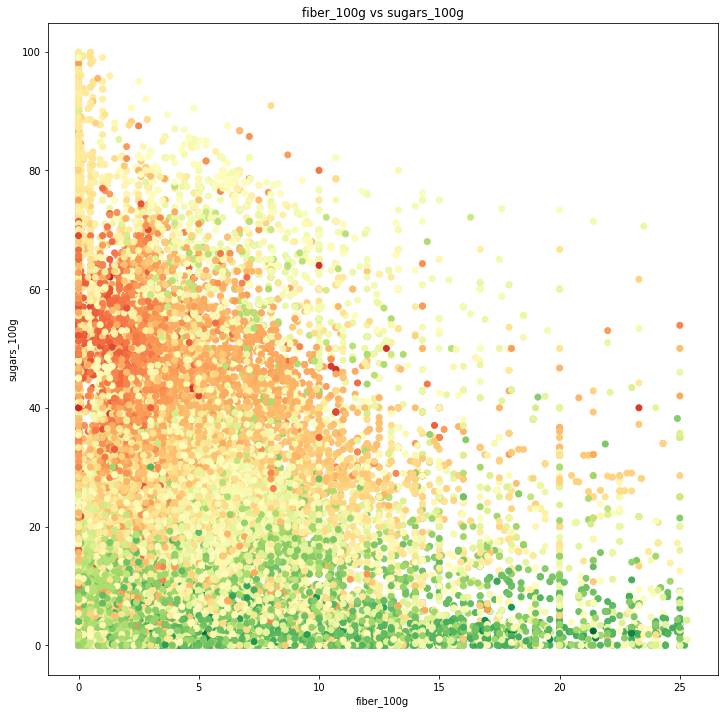

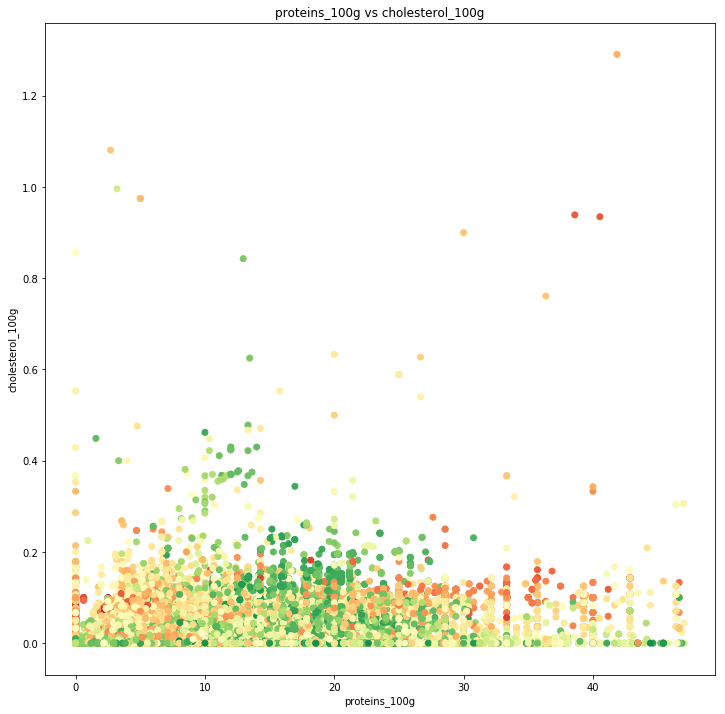

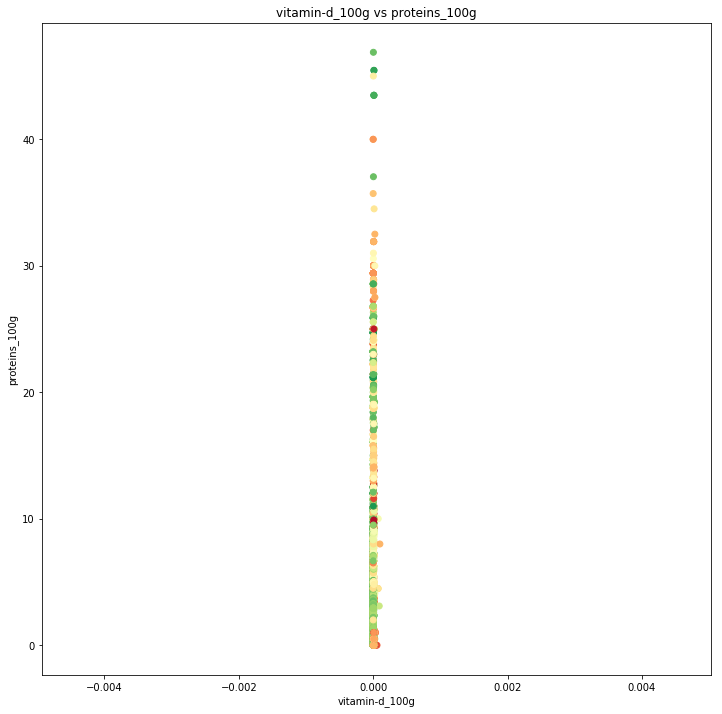

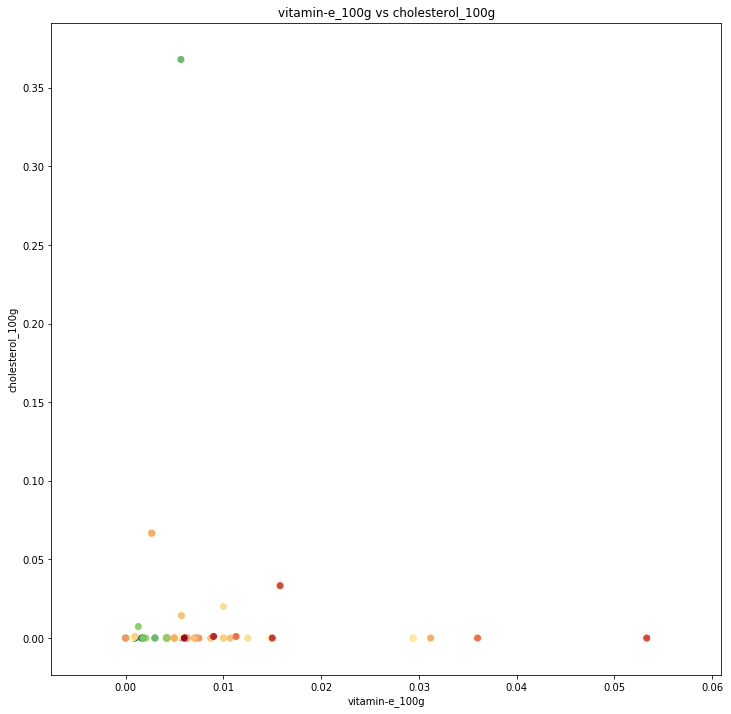

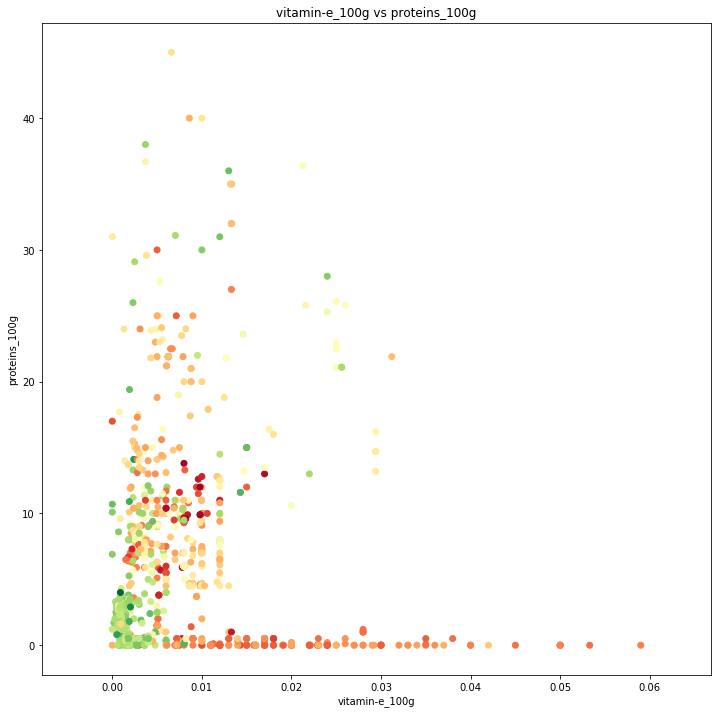

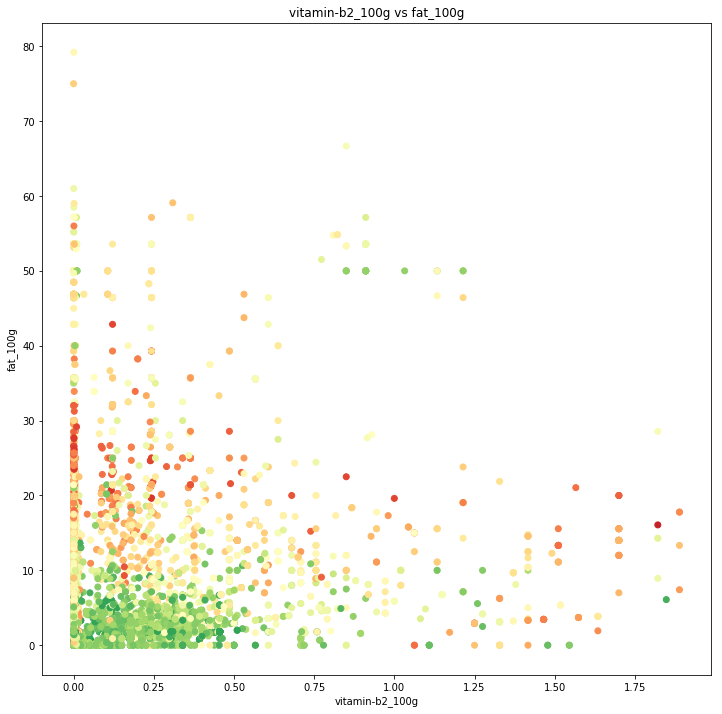

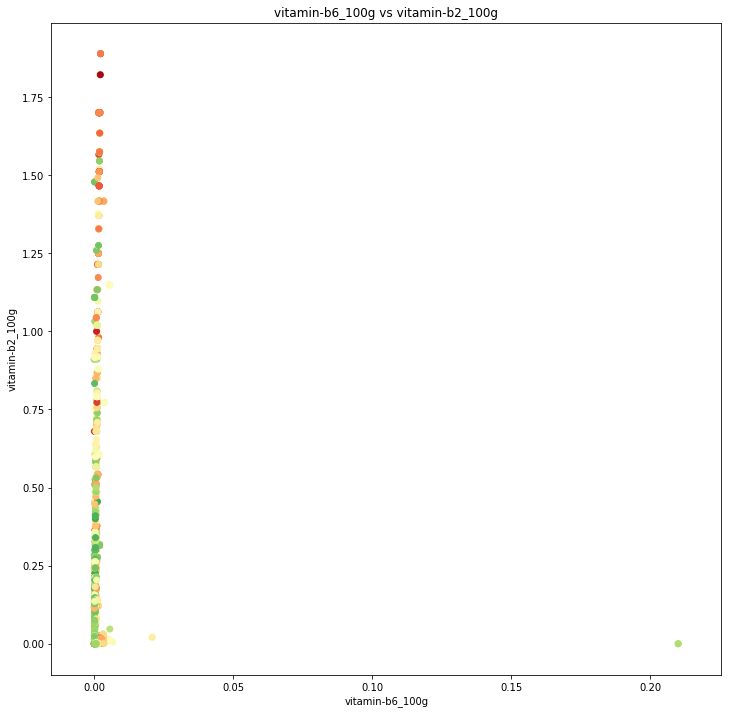

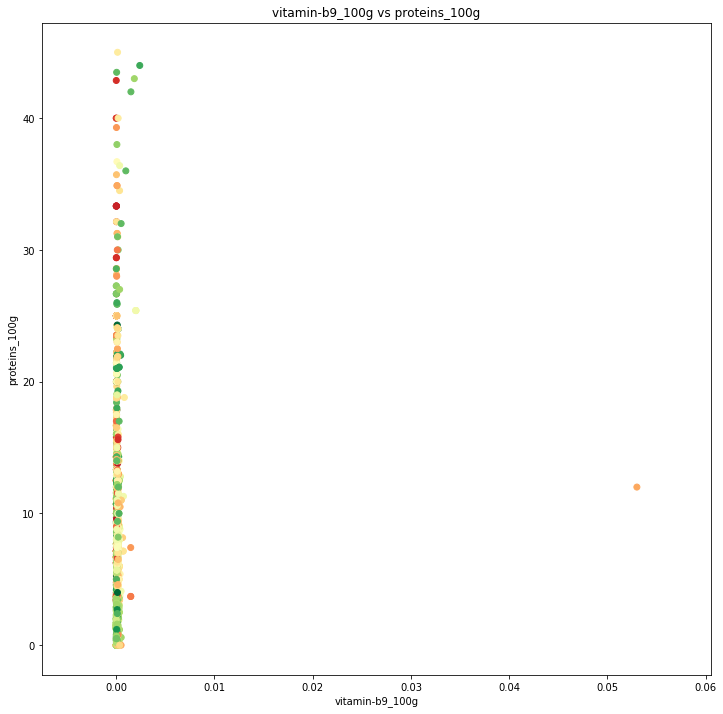

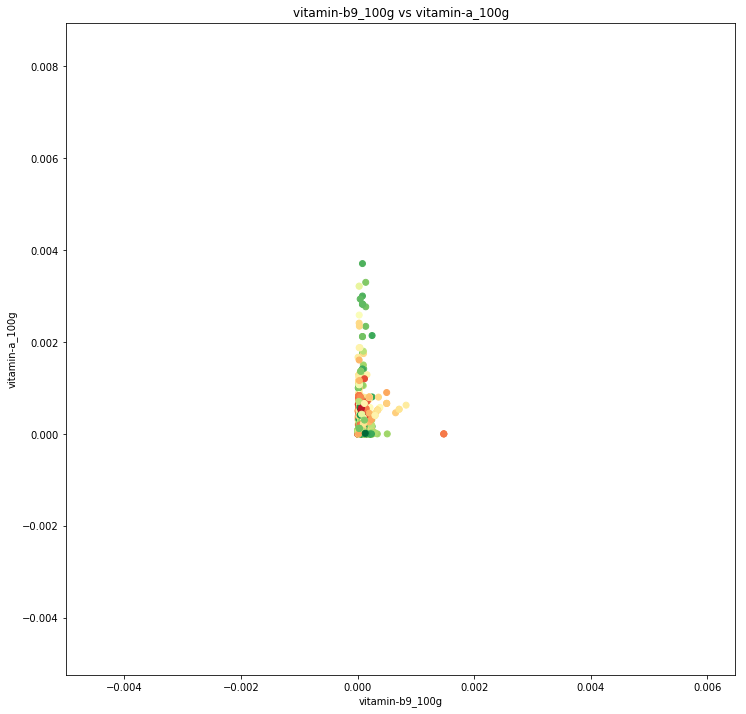

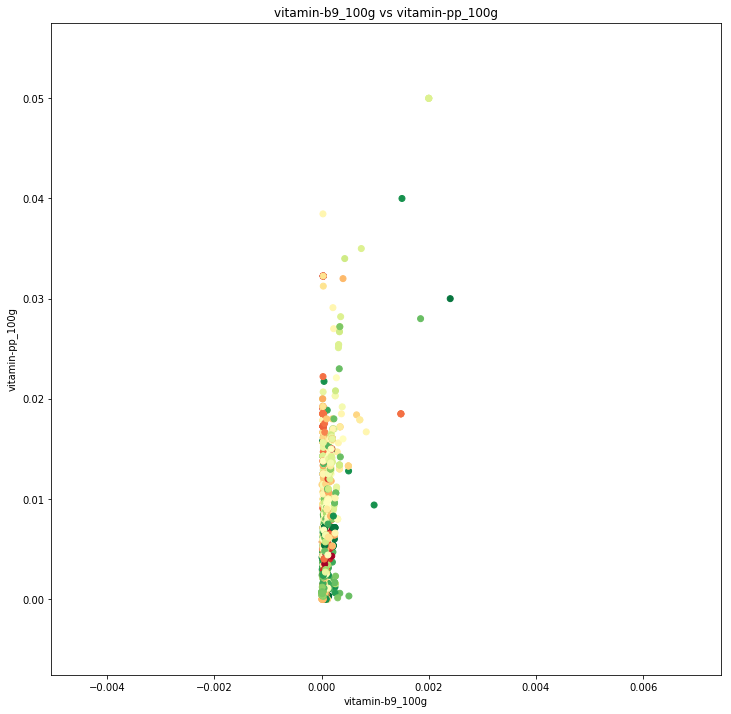

In [20]:
series = []
c_m = correlation_matrix.as_matrix()
for line in range(1, correlation_matrix.shape[0]):
    for col in range(line):
        if c_m[line, col] > 0.6:
            if dataset.columns[line].endswith("_100g") and dataset.columns[col].endswith("_100g"):
                x, y = dataset.columns[line], dataset.columns[col]
                fig = plt.figure(figsize=(12,12))
                plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
                plt.title("{} vs {}".format(x, y))
                plt.xlabel(x)
                plt.ylabel(y)
                plt.show()

In [21]:
plt.figure(figsize=(12,12))
g = sns.boxplot(x="pnns_groups_1", y="nutrition-score-uk_100g", data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

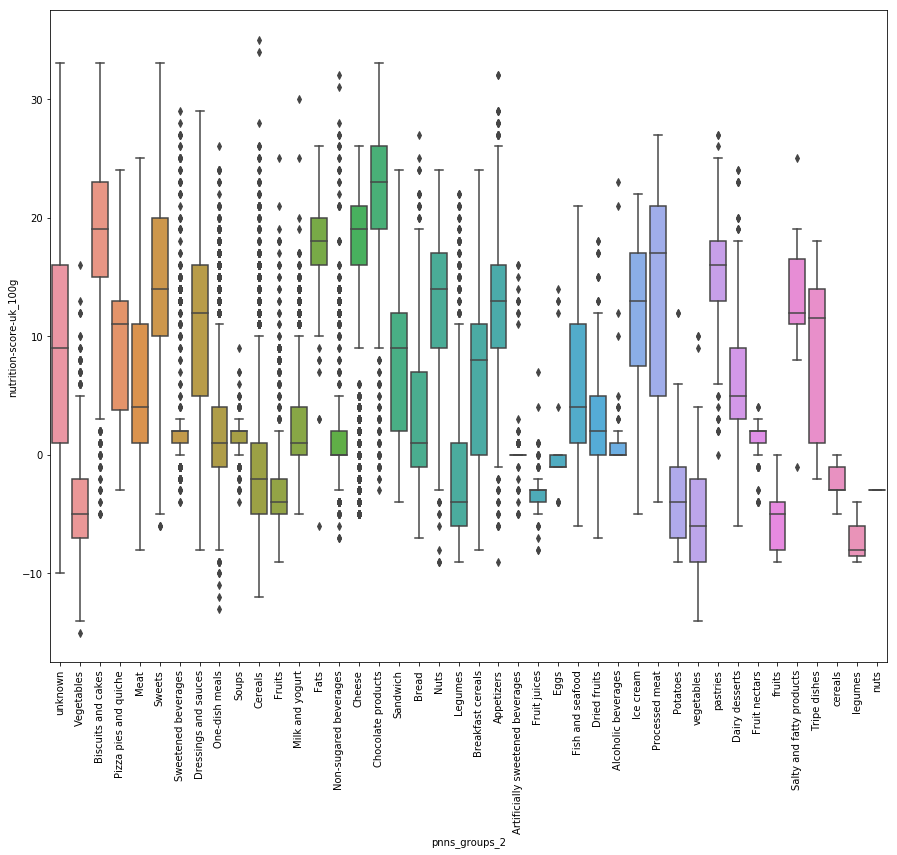

In [22]:
plt.figure(figsize=(15,12))
g = sns.boxplot(x="pnns_groups_2", y="nutrition-score-uk_100g", data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

In [23]:
dataset = dataset[(dataset["vitamin-b1_100g"] < 0.05) | (dataset["vitamin-b1_100g"].isnull())]
dataset = dataset[(dataset["vitamin-d_100g"] < 0.001) | (dataset["vitamin-b1_100g"].isnull())]

In [24]:
g = sns.pairplot(dataset[data[14:20]].dropna())

In [25]:
g = sns.pairplot(dataset[dataset.columns[1:7]].dropna())

### Reduction Dimensionnelle

In [26]:
from collections import defaultdict, Counter
from sklearn import preprocessing

d = defaultdict(preprocessing.LabelEncoder)

for col in dataset:
    if dataset[col].dtype == "object":
        dataset[col] = d[col].fit_transform(dataset[col].fillna('0'))

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop("nutrition-score-uk_100g", axis=1).fillna('0').as_matrix())

C:\Anaconda501\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Anaconda501\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


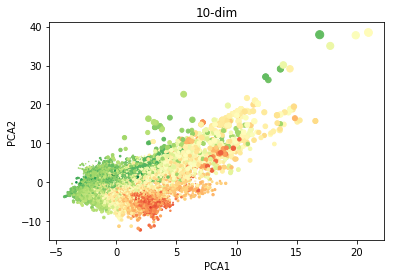

[ 0.09027206  0.06989578  0.05953775  0.04971893  0.043086    0.03745518
  0.03108661  0.03048371  0.02600831  0.02411207]
[ 0.09027206  0.16016784  0.21970559  0.26942452  0.31251051  0.3499657
  0.38105231  0.41153602  0.43754433  0.4616564 ]


In [46]:
from sklearn.decomposition import PCA

n_comp = 10
pca = PCA(n_components=n_comp)
# X_proj = pca.fit_transform(dataset.drop("nutrition-score-uk_100g", axis=1).fillna('0'))
X_proj = pca.fit_transform(X)

plt.scatter(X_proj[:, 0], X_proj[:, 1], s=X_proj[:, 2], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("{}-dim".format(n_comp))
#plt.savefig("{}-points".format(sample_size), dpi=600)
plt.show()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
print(pca.)

##  Analyse Composition

In [28]:
# def test(x):
#     if x<5:
#         return 1  
#     else:
#         return 0
# dataset["good"] = dataset["nutrition-score-uk_100g"].apply(lambda x : test(x))

In [47]:
quantiles = dataset["nutrition-score-uk_100g"].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
print(quantiles)

{0.25: 1.0, 0.5: 9.0, 0.75: 17.0}


In [54]:
def score(x):
    if x <= quantiles[0.25]:
        return "very good"
    elif x <= quantiles[0.50]:
        return "good"
    elif x <= quantiles[0.75]: 
        return "bad"
    else:
        return "very bad"

In [55]:
dataset["good"] = dataset["nutrition-score-uk_100g"].apply(score)

In [56]:
df = dataset.groupby("good").mean()

In [57]:
df

labels  allergens    traces  additives_n  \
good                                                      
1-very good  0.687182   0.266653  0.238498     1.171335   
2-good       0.485609   0.471629  0.301866     1.943629   
3-bad        0.339224   0.403622  0.267867     2.504490   
4-very bad   0.328930   0.375918  0.228041     2.108081   

             ingredients_from_palm_oil_n  \
good                                       
1-very good                     0.003326   
2-good                          0.013692   
3-bad                           0.027329   
4-very bad                      0.031320   

             ingredients_that_may_be_from_palm_oil_n  nutrition_grade_fr  \
good                                                                       
1-very good                                 0.029033            1.544030   
2-good                                      0.062301            2.833566   
3-bad                                       0.085983            3.900680   
4-very bad                                  0.056960            2.612109   

             pnns_groups_1  pnns_groups_2  energy_100g  \
good                                                     
1-very good       1.525402       7.887842   561.754429   
2-good            1.680980       7.021681   827.439730   
3-bad             1.756800       5.577724  1430.279139   
4-very bad        1.680422       4.697311  1371.855364   

                      ...             potassium_100g  calcium_100g  \
good                  ...                                            
1-very good           ...                   0.209215      0.054060   
2-good                ...                   0.298492      0.059477   
3-bad                 ...                   0.391551      0.071754   
4-very bad            ...                   0.197078      0.156088   

             phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  \
good                                                                 
1-very good         0.138825   0.001180        0.062016   0.001547   
2-good              0.230675   0.001321        0.123693   0.002900   
3-bad               0.349971   0.001758        0.159873   0.006458   
4-very bad          0.189857   0.001467        0.047383   0.003435   

             copper_100g  manganese_100g  fruits-vegetables-nuts_100g  \
good                                                                    
1-very good     0.000348        0.001499                    33.126148   
2-good          0.003261        0.001662                    23.458855   
3-bad           0.001009        0.001647                    26.064000   
4-very bad      0.000335        0.001680                    23.688814   

             nutrition-score-uk_100g  
good                                  
1-very good                -1.691504  
2-good                      4.882853  
3-bad                      13.410981  
4-very bad                 21.759701  

[4 rows x 44 columns]

In [58]:
plotlist = ["fat_100g", "saturated-fat_100g", "saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g", "trans-fat_100g", "cholesterol_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "energy_100g"]

In [59]:
plt.figure(figsize=(16,40))
for i, each in enumerate(plotlist):
    plt.subplot(7, 2, i+1)
    sns.boxplot(y=each, x="good", data=dataset)
plt.show()